In [ ]:
# what is regression?

# regression is a supervised learning algorithm that is used to predict the continuous values.

# linear regression

# linear regression is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables.


In [1]:
# we will use the diabetes dataset to predict the progression of diabetes after one year based on the given features.

# import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# load the dataset from sklearn

from sklearn.datasets import load_diabetes


In [ ]:
diabetes = load_diabetes()

# create a dataframe
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.head()

In [2]:
# add the target variable to the dataframe
df['progression'] = diabetes.target
# check the shape of the dataframe
df.shape

(442, 11)

In [3]:
# lets use bmi as the feature to predict the progression of diabetes

# create the feature and target variable
X = df[['bmi']] #note that we are using a 2D array
y = df['progression']


In [4]:
# load linear regression model from sklearn

from sklearn.linear_model import LinearRegression
# create an instance of the model
lr = LinearRegression()

In [5]:
# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 42 is specific seed value

In [6]:
X_train[:5]

,bmi
17,0.012117
66,-0.018062
137,0.049840
245,-0.035307
31,-0.065486


In [7]:
y_train[:5]

C:\Users\val-wd\AppData\Local\Temp\ipykernel_6444\1629913615.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train[:5]


17     144.0
66     150.0
137    280.0
245    125.0
31      59.0
Name: progression, dtype: float64

In [9]:
# fit the model on the training data
lr.fit(X_train, y_train) 
# so regressor worked on the training data and learned the relationship between bmi and progression

LinearRegression()

In [10]:
# make some predictions
y_pred = lr.predict(X_test) # notice we do them on test

In [11]:
# check the accuracy of the model
lr.score(X_test, y_test)

0.23335039815872138

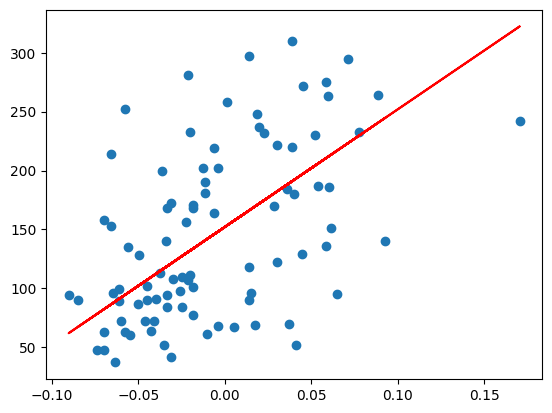

In [12]:
# plot
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [14]:
# describe the diabetes dataset

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
# link to diabetes dataset on UCI machine learning repository
# https://archive.ics.uci.edu/ml/datasets/Diabetes - possibly different datasets



In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [17]:
# as the note says the values have been normalized - mean is 0 and sum of squares in each column is 1

# lets check the correlation between the features and the target variable

df.corr()['progression'].sort_values()

# positive correlation means that as the value of the feature increases the value of the target variable also increases
# negative correlation means that as the value of the feature increases the value of the target variable decreases

# over 0.5 is considered a strong correlation

s3            -0.394789
sex            0.043062
s2             0.174054
age            0.187889
s1             0.212022
s6             0.382483
s4             0.430453
bp             0.441482
s5             0.565883
bmi            0.586450
progression    1.000000
Name: progression, dtype: float64

In [ ]:
# so questions to ask before fitting a model

# has the data been normalized?

# 1. is there a linear relationship between the feature and the target variable?
# 2. is there a correlation between the feature and the target variable?
# 3. is the variance of the feature similar across the target variable?


In [19]:
# lets fit bmi and s5 as the features to predict the progression of diabetes

# create the feature and target variable
X = df[['bmi', 's5']] #note that we are using a 2D array
y = df['progression']

# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 42 is specific seed value
# 42 is arbitrary - just something that we get the same results each time

In [20]:
# create an instance of the model

lr = LinearRegression()
# fit the model on the training data
lr.fit(X_train, y_train)

# make some predictions
y_pred = lr.predict(X_test)


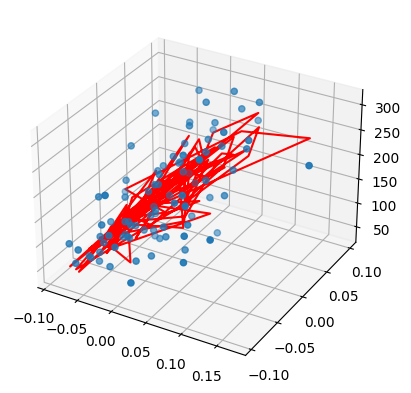

In [21]:
# 3d plot the regression line

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['bmi'], X_test['s5'], y_test)
ax.plot(X_test['bmi'], X_test['s5'], y_pred, color='red')
plt.show()

In [ ]:
# documenttation on LinearRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [22]:
# intercept

lr.intercept_

151.78215201657332

In [23]:
# coefficients

lr.coef_

array([732.10902123, 562.22653533])

In [ ]:
# so the more features we add the more complex the model becomes
# the more complex the model the more likely it is to overfit the data

In [28]:
# lets check mean squared error and r2 score
# so from submodule metrics we will import mean_squared_error and r2_score
# how about absolute error?

# metrics documentation
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))


Mean Squared Error: 2901.8369415567036
Mean Absolute Error: 43.98824346868295
R2 Score: 0.4522925957397932


In [ ]:
# what is mean squared error?

# mean squared error is a loss function that measures the average of the squares of the errors or deviations.

# why do we use mean squared error? why not mean absolute error?

# mean squared error is differentiable and hence can be used in gradient descent to find the minimum value of the loss function.

In [ ]:
# so square root of mean squared error is called root mean squared error
# symbol for root mean squared error is rmse

In [ ]:
# what is r2 score?

# r2 score is a statistical measure of how close the data are to the fitted regression line.

# r2 score is also known as the coefficient of determination.

In [29]:
def my_fun(x, a=3.1415, b=2.7182):
    return a+b*x # simple linear function

# lets get range of values for x
x = np.arange(0, 10, 0.1) # 0 to 10 with step size of 0.1
y = my_fun(x)
print(y)

[ 3.1415   3.41332  3.68514  3.95696  4.22878  4.5006   4.77242  5.04424
  5.31606  5.58788  5.8597   6.13152  6.40334  6.67516  6.94698  7.2188
  7.49062  7.76244  8.03426  8.30608  8.5779   8.84972  9.12154  9.39336
  9.66518  9.937   10.20882 10.48064 10.75246 11.02428 11.2961  11.56792
 11.83974 12.11156 12.38338 12.6552  12.92702 13.19884 13.47066 13.74248
 14.0143  14.28612 14.55794 14.82976 15.10158 15.3734  15.64522 15.91704
 16.18886 16.46068 16.7325  17.00432 17.27614 17.54796 17.81978 18.0916
 18.36342 18.63524 18.90706 19.17888 19.4507  19.72252 19.99434 20.26616
 20.53798 20.8098  21.08162 21.35344 21.62526 21.89708 22.1689  22.44072
 22.71254 22.98436 23.25618 23.528   23.79982 24.07164 24.34346 24.61528
 24.8871  25.15892 25.43074 25.70256 25.97438 26.2462  26.51802 26.78984
 27.06166 27.33348 27.6053  27.87712 28.14894 28.42076 28.69258 28.9644
 29.23622 29.50804 29.77986 30.05168]


In [30]:
simple_df = pd.DataFrame({'x': x, 'y': y})
simple_df.head()

,x,y
0,0.0,3.14150
1,0.1,3.41332
2,0.2,3.68514
3,0.3,3.95696
4,0.4,4.22878


In [31]:
# lets get X and y
X = simple_df[['x']] # again notice the double brackets because we are using a 2D array
# we could be using multiple columns as features, so we pass a list of columns
# in this case just one column
y = simple_df['y']


In [32]:
# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 42 is specific seed value

In [33]:
# create an instance of the model
lr = LinearRegression()
# fit the model on the training data
lr.fit(X_train, y_train)

# make some predictions
y_pred = lr.predict(X_test)


In [34]:
# get the intercept and coefficients
print('Intercept:', lr.intercept_)
print('Coefficients:', lr.coef_)


Intercept: 3.1414999999999935
Coefficients: [2.7182]


In [36]:
# r 2 score
print('R2 Score:', r2_score(y_test, y_pred)) # so comparing test and predicted values
# so not shocking that the r2 score is 1 because we used linear function to generate the data
# root mean squared error
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
# again almost no error because we used linear function to generate the data

R2 Score: 1.0
Root Mean Squared Error: 4.061656519258418e-15


In [ ]:
# first lets compare the r2 score and root mean squared error for the diabetes dataset for bmi and s5 separately

# create the feature and target variable
X = df[['bmi']] #note that we are using a 2D array
y = df['progression']

# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 42 is specific seed value
# 42 is arbitrary - just something that we get the same results each time

# create an instance of the model


In [37]:
# lets make a function that will take dataframe and features as input and return r2 score and root mean squared error

def get_r2_rmse(df, features):
    X = df[features] #note that we are using a 2D array
    y = df['progression'] # TODO pass argument for target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr = LinearRegression() # TODO pass regression model as argument
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return r2, rmse # we are throwing away the intercept and coefficients and the model

In [38]:
# lets try our function on the diabetes dataset
# we will use all combinations of s3 s5 and bmi

combins = [['s3'], ['s5'], ['bmi'], ['s3', 's5'], ['s3', 'bmi'], ['s5', 'bmi'], ['s3', 's5', 'bmi']]
# we could have done this using itertools
# import itertools
# combins = list(itertools.combinations(['s3', 's5', 'bmi'], 1)) # 1 means 1 feature
# combins = list(itertools.combinations(['s3', 's5', 'bmi'], 2)) # all combinations of 2 features
# combins = list(itertools.combinations(['s3', 's5', 'bmi'], 3)) # all combinations of 3 features

r2_list = []
rmse_list = []
for comb in combins:
    r2, rmse = get_r2_rmse(df, comb)
    print('Features:', comb, 'R2 Score:', r2, 'Root Mean Squared Error:', rmse)
    r2_list.append(r2)
    rmse_list.append(rmse)

# lets plot the r2 score and root mean squared error




Features: ['s3'] R2 Score: 0.18512226947901855 Root Mean Squared Error: 65.70651316868806
Features: ['s5'] R2 Score: 0.38269153958537394 Root Mean Squared Error: 57.18910647072432
Features: ['bmi'] R2 Score: 0.23335039815872138 Root Mean Squared Error: 63.73245584860925
Features: ['s3', 's5'] R2 Score: 0.4039957700968644 Root Mean Squared Error: 56.193601528862594
Features: ['s3', 'bmi'] R2 Score: 0.2897606403164088 Root Mean Squared Error: 61.342936882520796
Features: ['s5', 'bmi'] R2 Score: 0.4522925957397932 Root Mean Squared Error: 53.8687009455092
Features: ['s3', 's5', 'bmi'] R2 Score: 0.45560548367194353 Root Mean Squared Error: 53.70553750374669


In [39]:
# lets create a dataframe with the results
results_df = pd.DataFrame({'features': combins, 'r2': r2_list, 'rmse': rmse_list})
results_df

,features,r2,rmse
0,[s3],0.185122,65.706513
1,[s5],0.382692,57.189106
2,[bmi],0.233350,63.732456
3,"[s3, s5]",0.403996,56.193602
4,"[s3, bmi]",0.289761,61.342937
5,"[s5, bmi]",0.452293,53.868701
6,"[s3, s5, bmi]",0.455605,53.705538


In [42]:
# convert features column to string
# so we can use it as a label
# i used a anonymous function to do this - so we can apply it to each row
# i made a tiny lambda fuction to do this

results_df['features_str'] = results_df['features'].apply(lambda x: "_".join(x))
# convert features column to string
# so we can use it as a label
# i could pass a premade function such as str to do this as well
results_df['simple_str'] = results_df['features'].apply(str)	
results_df

,features,r2,rmse,features_str,simple_str
0,[s3],0.185122,65.706513,s3,['s3']
1,[s5],0.382692,57.189106,s5,['s5']
2,[bmi],0.233350,63.732456,bmi,['bmi']
3,"[s3, s5]",0.403996,56.193602,s3_s5,"['s3', 's5']"
4,"[s3, bmi]",0.289761,61.342937,s3_bmi,"['s3', 'bmi']"
5,"[s5, bmi]",0.452293,53.868701,s5_bmi,"['s5', 'bmi']"
6,"[s3, s5, bmi]",0.455605,53.705538,s3_s5_bmi,"['s3', 's5', 'bmi']"


Text(0.5, 1.0, 'R2 Score for Different Features')

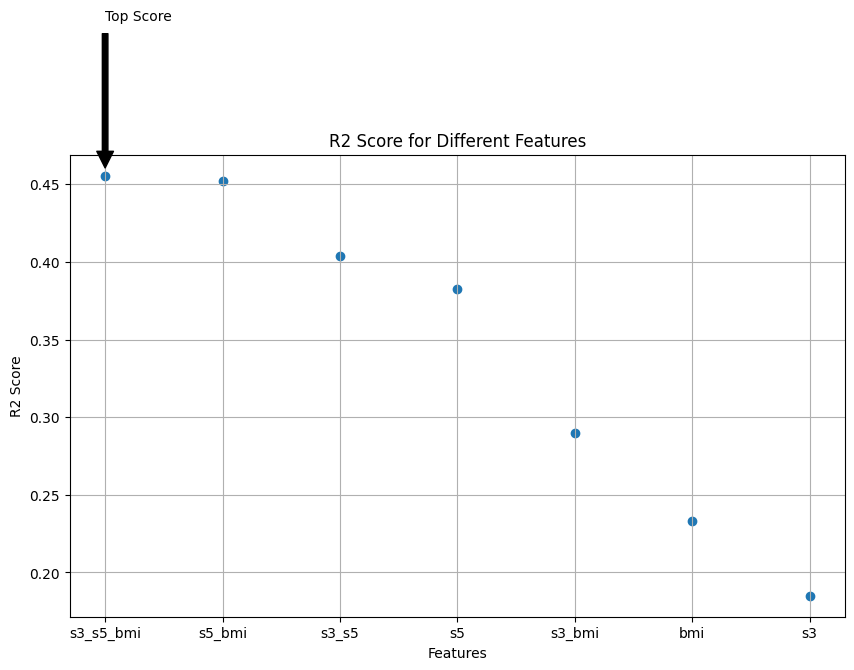

In [48]:
# lets plot the r2 score and root mean squared error
# we will use the results dataframe
# lets sort the dataframe by r2 score
results_df.sort_values(by='r2', ascending=False, inplace=True)

# lets plot the r2 score
plt.figure(figsize=(10, 6))
plt.scatter(results_df['features_str'], results_df['r2'], marker='o')
# add grid
plt.grid()
# add arrow to top score
# i got the location of the top score using the iloc method since first row is the top score
# then added a little bit of offset to the x and y values
plt.annotate('Top Score', xy=(results_df.iloc[0]['features_str'], results_df.iloc[0]['r2']), xytext=(results_df.iloc[0]['features_str'], results_df.iloc[0]['r2']+0.1), arrowprops=dict(facecolor='black', shrink=0.05))
# add graph labels and title
plt.xlabel('Features')
plt.ylabel('R2 Score')
plt.title('R2 Score for Different Features')

# lines are not relevant here because x axis is categorical
# we are trying to see which combination of features gives the best r2 score

Text(0.5, 1.0, 'Root Mean Squared Error for Different Features')

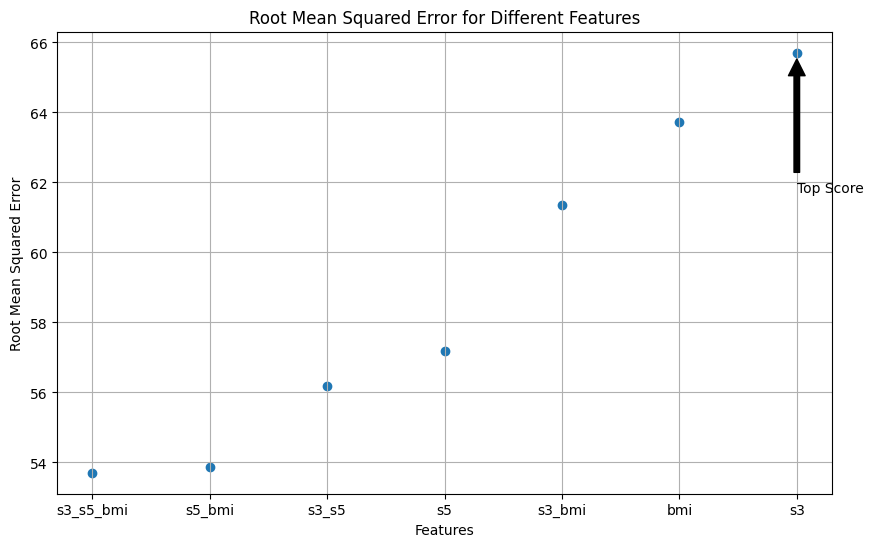

In [51]:
# lets plot the root mean squared error in the same way
# we will use the results dataframe

# lets sort the dataframe by root mean squared error
results_df.sort_values(by='rmse', ascending=True, inplace=True)

# lets plot the root mean squared error
plt.figure(figsize=(10, 6))
plt.scatter(results_df['features_str'], results_df['rmse'], marker='o')
# add grid
plt.grid()
# add arrow to top score
# i got the location of the top score using the iloc method since first row is the top score
# then added a little bit of offset to the x and y values
plt.annotate('Top Score', xy=(results_df.iloc[-1]['features_str'], results_df.iloc[-1]['rmse']), xytext=(results_df.iloc[-1]['features_str'], results_df.iloc[-1]['rmse']-4), arrowprops=dict(facecolor='black', shrink=0.05))
# add graph labels and title
plt.xlabel('Features')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error for Different Features')


In [ ]:
# so we want to maximize r2 score and minimize root mean squared error



In [ ]:
# TODO use a different regression model
# available models in sklearn
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

# maybe Lasso or Ridge regression

# TODO calculate the r2 score and root mean squared error for each model

# TODO investigate different ways to select features



In [ ]:
# try a different data set
# https://scikit-learn.org/stable/datasets/index.html#datasets

In [2]:
# try california housing dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing
# import fetch_california_housing from sklearn.datasets
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['target'] = california.target
california_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [53]:
# lets save the dataframe to a csv file
california_df.to_csv('../data/california_housing.csv', index=False)

In [3]:
california_df.shape

(20640, 9)

In [55]:
# memory usage of california_df
california_df.memory_usage(deep=True)

Index            128
MedInc        165120
HouseAge      165120
AveRooms      165120
AveBedrms     165120
Population    165120
AveOccup      165120
Latitude      165120
Longitude     165120
target        165120
dtype: int64

In [56]:
# info about california_df
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [57]:
20640*8 # so this optimal memory usage we have 20640 rows and 
# each cells has 8 bytes - float64 - 64bits -> 8 bytes

165120

## Lasso model

In [58]:
# create lasso model
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1) # 0 would mean no regularization


In [59]:
x2 = df[['bp']] 
y2 = df['progression']
# split the data into train and test set
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42) # 42 is specific seed value

In [61]:
# fit the model on the training data
lasso.fit(x2_train, y2_train) 

Lasso(alpha=0.1)

In [63]:
# make some predictions
y2_pred = lasso.predict(x2_test) # notice we do them on test

In [65]:
# check the accuracy of the model
lasso.score(x2_test, y2_test)

0.17295733141229486

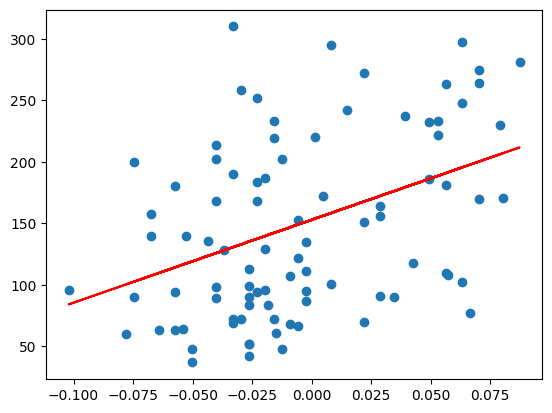

In [66]:
# plot
plt.scatter(x2_test, y2_test)
plt.plot(x2_test, y2_pred, color='red')
plt.show()

In [67]:
print('Mean Squared Error:', mean_squared_error(y2_test, y2_pred))
print('Mean Absolute Error:', mean_absolute_error(y2_test, y2_pred))
print('R2 Score:', r2_score(y2_test, y2_pred))

Mean Squared Error: 4381.7975606757855
Mean Absolute Error: 57.31864379994775
R2 Score: 0.17295733141229486


In [69]:
# we could fit a higher level polynomial

# lets try a polynomial regression

# import PolynomialFeatures from sklearn.preprocessing

from sklearn.preprocessing import PolynomialFeatures

# create a polynomial features object

poly = PolynomialFeatures(degree=2) # degree is the highest power of the polynomial # so square

# transform the x2_train and x2_test data

poly.fit(x2_train)

# make some predictions
poly_y2_pred = poly.transform(x2_test) # notice we do them on test

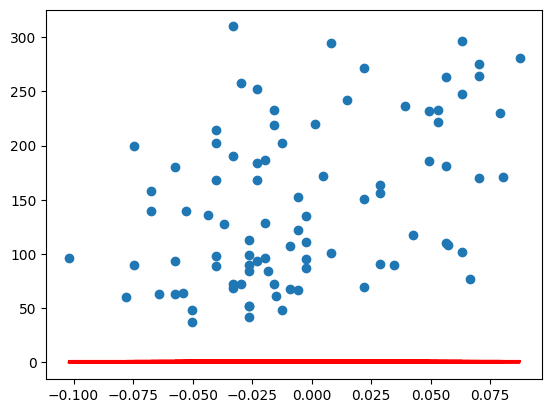

In [70]:
# plot polynomial regression
plt.scatter(x2_test, y2_test)
plt.plot(x2_test, poly_y2_pred, color='red')
plt.show()

In [ ]:
# TODO try different degrees of polynomial regression 
#  if you do higher level polynomial regression you will get overfitting !!
# this means your data will be very accurate on the training data but not on the test data

In [4]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
# lets get correlation matrix
california_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


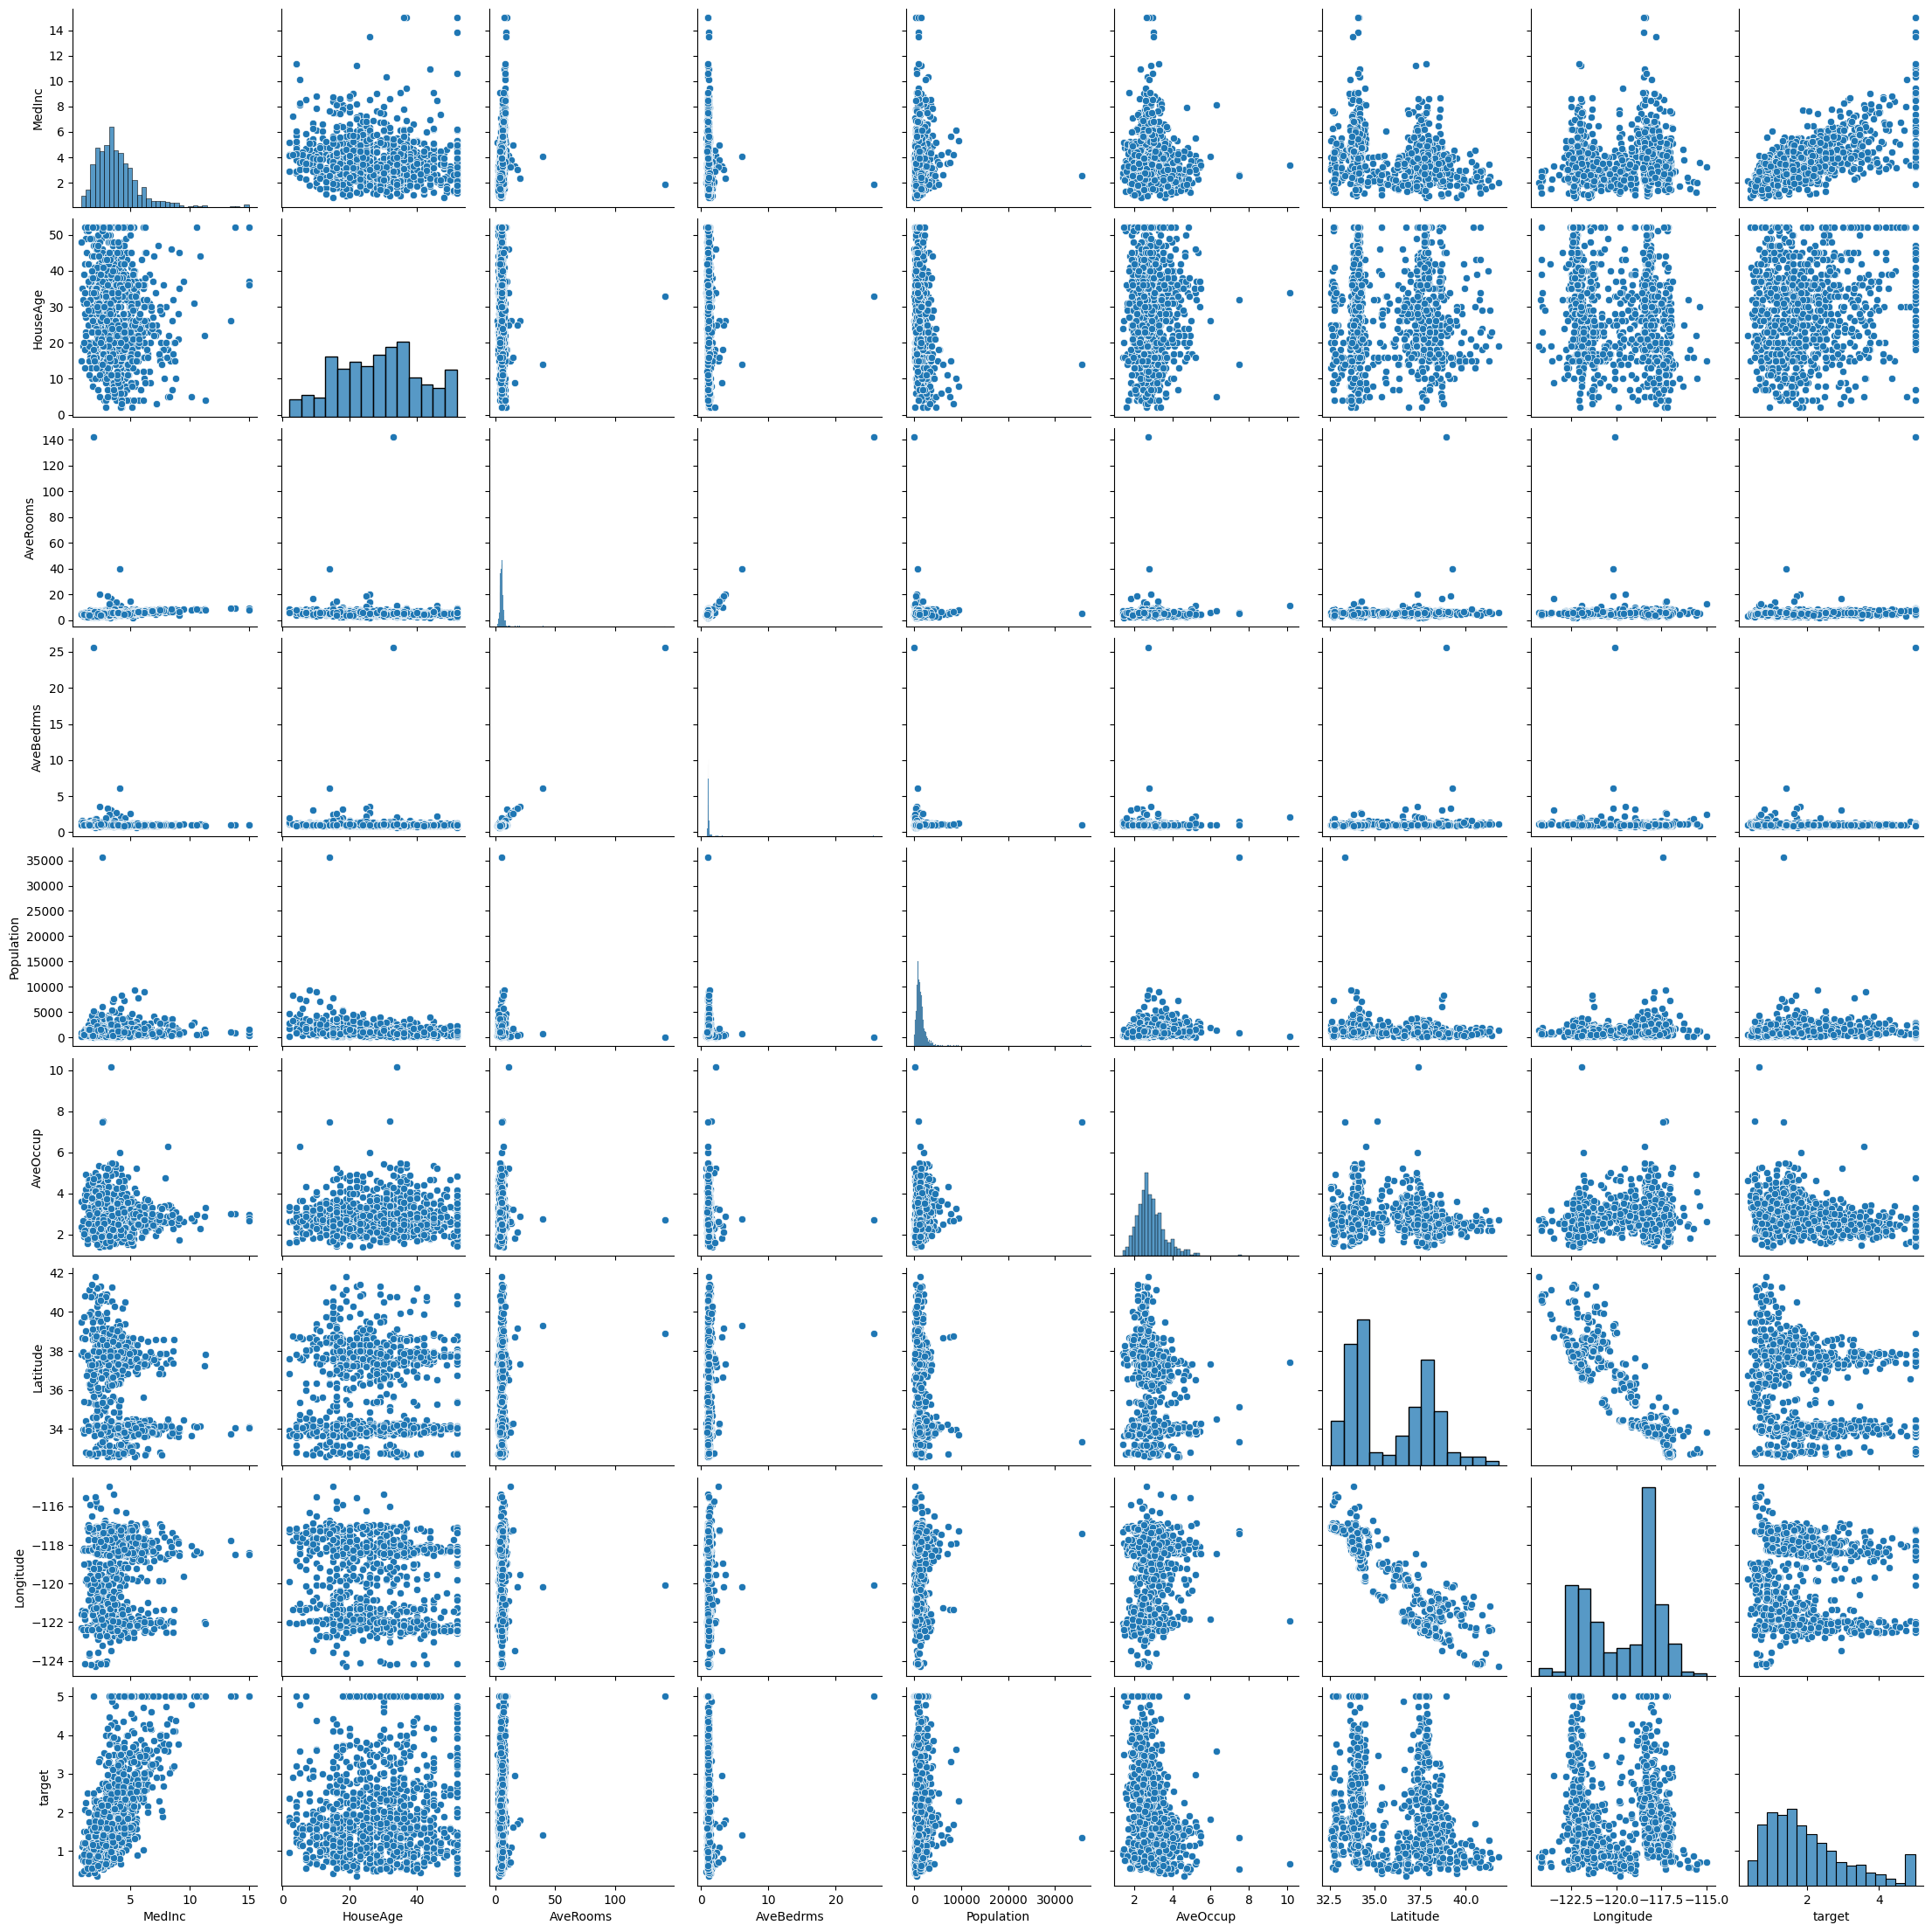

In [6]:
# lets do some pairplots
sns.pairplot(california_df.sample(1000))

In [8]:
# first lets do a linear regression with just median income

# lets get the data
X3 = california_df[['MedInc']]
y3 = california_df['target']

# split the data into train and test set
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42) # 42 is specific seed value

# import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression
# create linear regression model
lin_reg = LinearRegression()

# fit the model on the training data
lin_reg.fit(X3_train, y3_train)

# make some predictions
y3_pred = lin_reg.predict(X3_test)

# check the accuracy of the model
lin_reg.score(X3_test, y3_test)

# residuals are the difference between the actual value and the predicted value

0.45885918903846656

Text(0.5, 1.0, 'Residuals vs Actual Values')

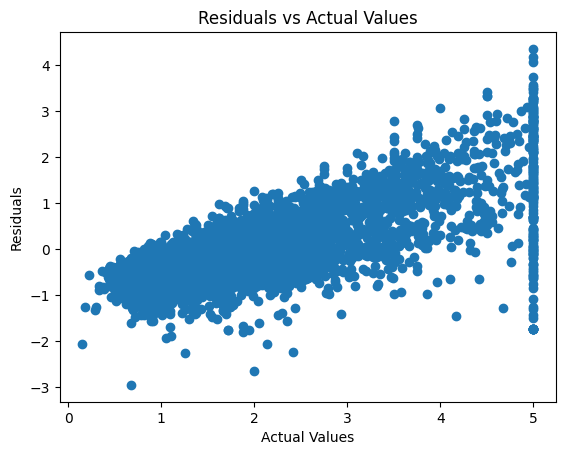

In [10]:
# lets plot the residuals
plt.scatter(y3_test, y3_test - y3_pred)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Values')

In [11]:
# print error metrics
# first import
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean Squared Error:', mean_squared_error(y3_test, y3_pred))
print('Mean Absolute Error:', mean_absolute_error(y3_test, y3_pred))
print('R2 Score:', r2_score(y3_test, y3_pred))

Mean Squared Error: 0.7091157771765548
Mean Absolute Error: 0.629908653009376
R2 Score: 0.45885918903846656


In [13]:
california_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [20]:
# we could add some more features to the model

# first lets create a new feature called bedrooms per room
# idea being that lower proportion of bedrooms per room is better
# why? because more rooms means more space
# then you have room for rooms such as living room, dining room, kitchen, etc

# lets create a new feature

california_df['bedrooms_per_room'] = california_df['AveBedrms'] / california_df['AveRooms']

# that was an example of feature engineering
# lets do some more feature engineering

# lets create a new feature called population per household
# idea being that lower proportion of population per household is better
# why? because more rooms means more space

# lets create a new feature occupancy per room

california_df['occupancy_per_room'] = california_df['AveOccup'] / california_df['AveRooms']

california_df.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,bedrooms_per_room,population_per_household,occupancy_per_room
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.146591,7.853659,0.365909
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.155797,114.333333,0.338217
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.129516,9.538462,0.338105
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.184458,10.730769,0.437991
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.172096,10.865385,0.347265


In [21]:
# lets pring correlation matrix again

california_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,bedrooms_per_room,population_per_household,occupancy_per_room
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075,-0.615479,0.084166,-0.011075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623,0.136367,-0.430402,0.023236
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948,-0.418704,0.045670,-0.040912
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701,0.055817,-0.005373,-0.017100
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650,0.037075,0.693832,0.061583
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737,0.002881,0.011716,0.959563
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160,-0.114302,-0.050005,-0.004598
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967,0.092868,0.076209,0.005178
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000,-0.255624,-0.014854,-0.033557
bedrooms_per_room,-0.615479,0.136367,-0.418704,0.055817,0.037075,0.002881,-0.114302,0.092868,-0.255624,1.000000,-0.076715,0.057714


In [16]:
# lets use MedInc and bedrooms_per_room as features

# lets get the data

X4 = california_df[['MedInc', 'bedrooms_per_room']]
y4 = california_df['target']

# split the data into train and test set

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42) # 42 is specific seed value

# create linear regression model

lin_reg2 = LinearRegression()

# fit the model on the training data

lin_reg2.fit(X4_train, y4_train)

# make some predictions

y4_pred = lin_reg2.predict(X4_test)

# print error metrics

print('Mean Squared Error:', mean_squared_error(y4_test, y4_pred))
print('Mean Absolute Error:', mean_absolute_error(y4_test, y4_pred))
print('R2 Score:', r2_score(y4_test, y4_pred))

Mean Squared Error: 0.652015058085476
Mean Absolute Error: 0.5900361312619201
R2 Score: 0.5024339203164307


In [17]:
# print coefficients and intercept
print(f"Intercept: {lin_reg2.intercept_}")
print(f"Coefficients: {lin_reg2.coef_}")

Intercept: -1.1041440908241875
Coefficients: [0.5211314  5.42008418]


In [18]:
# predict a single value
lin_reg2.predict([[3.0, 0.5]]) # notice the double brackets so list of lists,
# outer list holds rows of data, inner list holds columns of data
# will output an array - here a single element array

c:\Users\val-wd\demoOctober\Python_SheGoesTech_22\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.16929219])

In [ ]:
# TODO try non linear regression models
# sometimes you might want to use log of some feature
# or square root of some feature

In [ ]:
# there is also time series anylisis where you can make predictions based on previous data
# for example you can predict the price of a stock based on previous prices - everyone tries to do this
# but simple linear regression is not good for this - past performance does not guarantee future performance
# TODO explore time series analysis in the future

# also we did not explore some of the deep learning models that's also TODO
